## MCPI-Machine Learning
## K-Means Algorithm Implementation

- Cristopher Emmanuelle González Nuñez
- Carlos Humberto Espino
- Pablo César Rodríguez Aguayo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
def load_dataset(name):
    return np.loadtxt(name)

In [3]:
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [4]:
def kmeans(k, epsilon=0, distance='euclidian'):
    history_centroids = []
    if distance == 'euclidian':
        dist_method = euclidian
    dataset = load_dataset('randomdata.txt')
    num_instances, num_features = dataset.shape
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype, instance)
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
        tmp_prototypes = np.zeros((k, num_features))

        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            # prototype = dataset[np.random.randint(0, num_instances, size=1)[0]]
            tmp_prototypes[index, :] = prototype

        prototypes = tmp_prototypes

        history_centroids.append(tmp_prototypes)
        plot(dataset, history_centroids, belongs_to)

    return prototypes, history_centroids, belongs_to

In [9]:
def plot(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'x'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                plt.show()

In [13]:
def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'x'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)



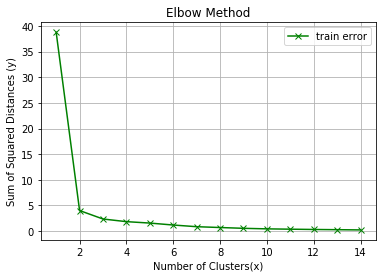

In [14]:
def elbow_method():
    ssd = []
    dataset = load_dataset('randomdata.txt')
    for k in range(1, 15):
        kmeans_model = KMeans(k)
        kmeans_model.fit(dataset)
        ssd.append(kmeans_model.inertia_)
    return ssd

ssd = elbow_method()
plt.plot(np.arange(1,15),ssd, label = 'train error', color='green', marker='x')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters(x)')
plt.ylabel('Sum of Squared Distances (y)')
plt.grid()
plt.legend()
plt.show()

centroids 1 [ 0.63405356  0.68734655]


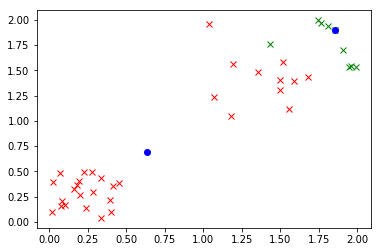

centroids 1 [ 1.82468917  1.76264761]
centroids 1 [ 0.63405356  0.68734655]


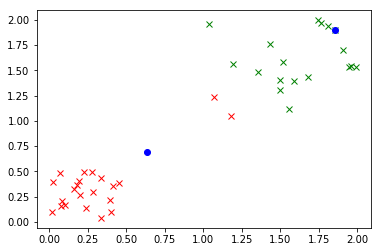

centroids 1 [ 1.82468917  1.76264761]
centroids 2 [ 0.30560454  0.36706042]
centroids 2 [ 1.63080905  1.61645791]
centroids 1 [ 0.63405356  0.68734655]


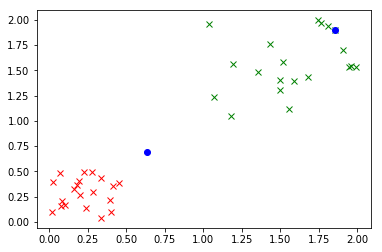

centroids 1 [ 1.82468917  1.76264761]
centroids 2 [ 0.30560454  0.36706042]
centroids 2 [ 1.63080905  1.61645791]
centroids 3 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 1 [ 0.63405356  0.68734655]


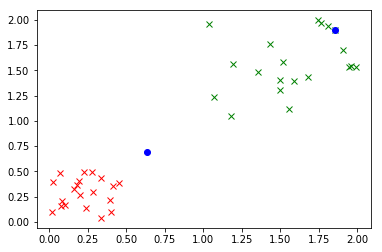

centroids 1 [ 1.82468917  1.76264761]
centroids 2 [ 0.30560454  0.36706042]
centroids 2 [ 1.63080905  1.61645791]
centroids 3 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 4 [ 0.22331067  0.28960446]
centroids 4 [ 1.58058247  1.56897412]
centroids 1 [ 0.63405356  0.68734655]


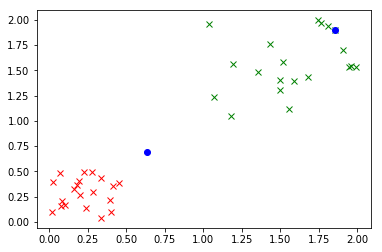

centroids 1 [ 1.82468917  1.76264761]
centroids 2 [ 0.30560454  0.36706042]
centroids 2 [ 1.63080905  1.61645791]
centroids 3 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 4 [ 0.22331067  0.28960446]
centroids 4 [ 1.58058247  1.56897412]
centroids 5 [ 0.22331067  0.28960446]
centroids 5 [ 1.58058247  1.56897412]


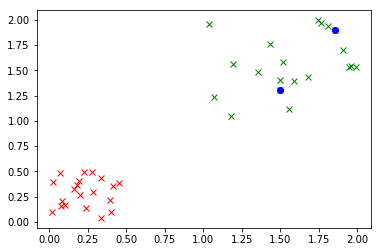

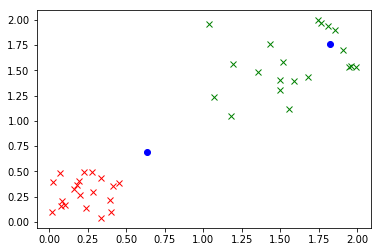

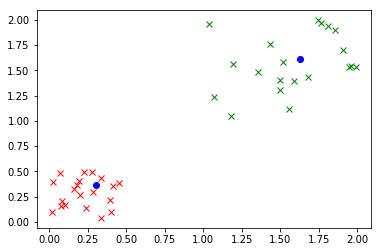

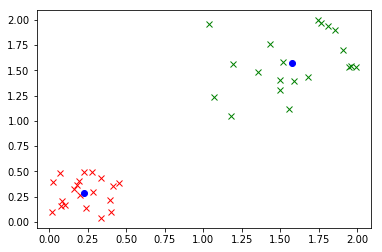

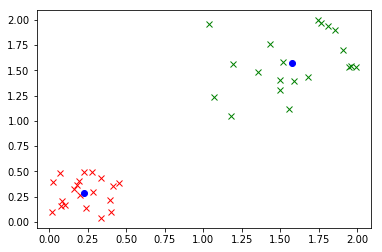

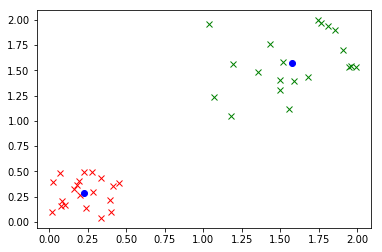

In [15]:
dataset = load_dataset('randomdata.txt')
centroids, history_centroids, belongs_to = kmeans(2)
#plot(dataset, history_centroids, belongs_to)

for item in history_centroids:
    plot_step_by_step(dataset, [item], belongs_to)